In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("BTC-USD.csv")
print(data.head())
print('.')
print('.')
print('.')
print('.')
print('.')
print(data.tail())

         Date     Open     High      Low    Close  Adj Close  Volume
0  2010-07-16  0.04951  0.04951  0.04951  0.04951    0.04951       0
1  2010-07-17  0.04951  0.08585  0.05941  0.08584    0.08584       5
2  2010-07-18  0.08584  0.09307  0.07723  0.08080    0.08080      49
3  2010-07-19  0.08080  0.08181  0.07426  0.07474    0.07474      20
4  2010-07-20  0.07474  0.07921  0.06634  0.07921    0.07921      42
.
.
.
.
.
            Date         Open         High          Low        Close  \
2912  2018-07-06  6602.029785  6814.419922  6518.229980  6758.080078   
2913  2018-07-07  6758.080078  6782.850098  6684.149902  6707.379883   
2914  2018-07-08  6707.459961  6803.100098  6625.580078  6668.839844   
2915  2018-07-09  6668.839844  6683.609863  6277.229980  6306.850098   
2916  2018-07-17  6740.549805  7476.240234  6677.560059  7311.700195   

        Adj Close     Volume  
2912  6758.080078  277167900  
2913  6707.379883  268455446  
2914  6668.839844  328316145  
2915  6306.850098  

In [3]:
data2=data.drop(data.index[0])
data2 = data2.append({'Date':'2018-07-18', 'Open':6744.54, 'High':7499, 'Low':6677, 'Close':7311, 'Adj Close':7311 , 'Volume':683387878}, ignore_index=True)
data.loc[data2['Open'] > data['Open'] , 'Status'] = 0 
data.loc[data2['Open'] < data['Open'] , 'Status'] = 1
print(data.tail())

            Date         Open         High          Low        Close  \
2912  2018-07-06  6602.029785  6814.419922  6518.229980  6758.080078   
2913  2018-07-07  6758.080078  6782.850098  6684.149902  6707.379883   
2914  2018-07-08  6707.459961  6803.100098  6625.580078  6668.839844   
2915  2018-07-09  6668.839844  6683.609863  6277.229980  6306.850098   
2916  2018-07-17  6740.549805  7476.240234  6677.560059  7311.700195   

        Adj Close     Volume  Status  
2912  6758.080078  277167900     0.0  
2913  6707.379883  268455446     1.0  
2914  6668.839844  328316145     1.0  
2915  6306.850098  470432142     0.0  
2916  7311.700195  682261952     0.0  


First_data and last_data

In [4]:
print('First Day Data : ')
print(data.values[0])
print('\n')
print('Last Day Data : ')
print(data.values[-1])

First Day Data : 
['2010-07-16' 0.049510000000000005 0.049510000000000005
 0.049510000000000005 0.049510000000000005 0.049510000000000005 0 nan]


Last Day Data : 
['2018-07-17' 6740.549805 7476.240234000001 6677.560059 7311.700195
 7311.700195 682261952 0.0]


# Visualization

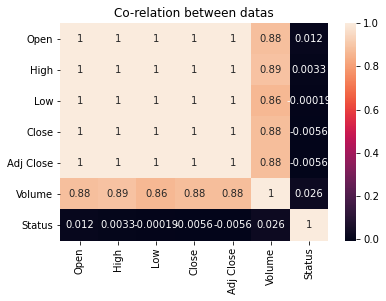

In [5]:
sns.heatmap(data.corr(), annot = True)
plt.title('Co-relation between datas')
plt.show()

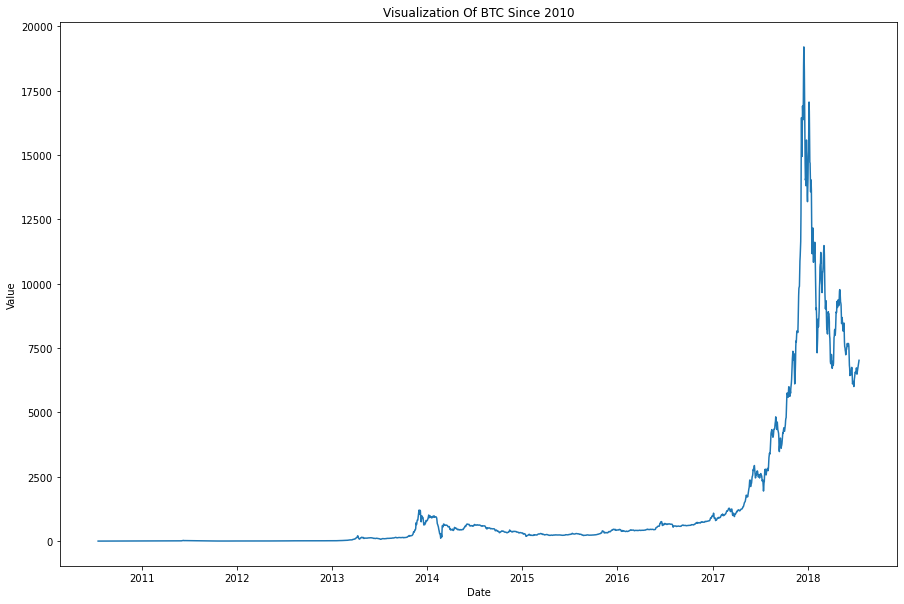

In [6]:
sabai=((data.Open + data.Close)/2.)
Dates = pd.to_datetime(data.Date)
plt.figure(figsize=(15,10))
plt.plot(Dates,sabai)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualization Of BTC Since 2010')
plt.show()

            Date         Open         High          Low        Close  \
2360  2017-01-01   963.380005  1001.609985   956.099976   995.440002   
2361  2017-01-02   995.440002  1031.680054   990.200012  1017.049988   
2362  2017-01-03  1017.049988  1035.469971  1006.530029  1033.300049   
2363  2017-01-04  1033.300049  1148.540039  1022.320007  1135.410034   
2364  2017-01-05  1135.410034  1150.630005   874.530029   989.349976   

        Adj Close     Volume      easy  
2360   995.440002   40570922  20170101  
2361  1017.049988   66038073  20170102  
2362  1033.300049   56085870  20170103  
2363  1135.410034  170584623  20170104  
2364   989.349976  244839289  20170105  


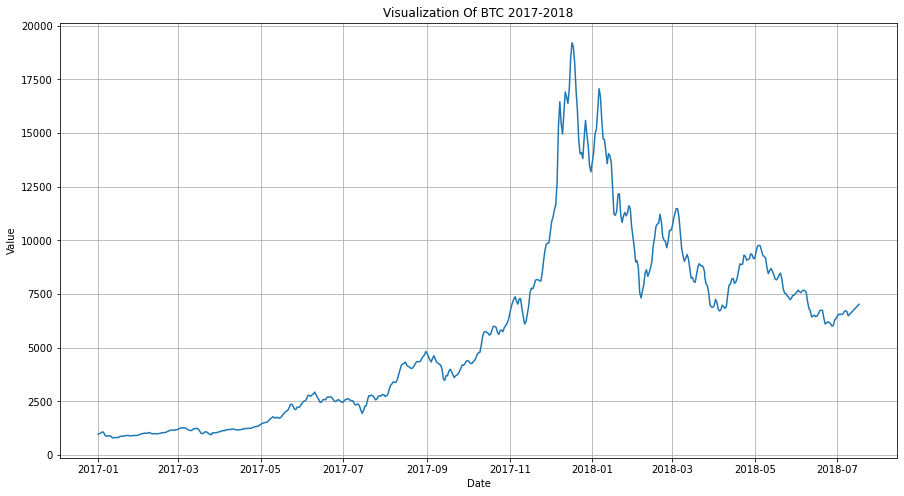

In [7]:
#CREATING NEW DATAFRAME OF YEAR 2017/2018
data['split']=data['Date'].str.split('-')
data['year']=data.split.str.get(0)
data['month']=data.split.str.get(1)
data['day']=data.split.str.get(2)
data['easy']=data['year']+data['month']+data['day']
data_17_18=data[data['year']>='2017']
#print(data_17_18.head(2))
data_17_18=data_17_18[['Date','Open','High','Low','Close','Adj Close','Volume','easy']]
print(data_17_18.head())
#print(data.head())

#Plotting Data of 2017 and 2018
sabai2=((data_17_18.Open + data_17_18.Close)/2.)
Dates2 = pd.to_datetime(data_17_18.Date)
plt.figure(figsize=(15,8))
plt.plot(Dates2,sabai2)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualization Of BTC 2017-2018')
plt.show()

data['easy'] =(data['easy'].astype('int64'))

            Date          Open          High           Low         Close  \
2725  2018-01-01  13850.490234  13921.530273  12877.669922  13444.879883   
2726  2018-01-02  13444.879883  15306.129883  12934.160156  14754.129883   
2727  2018-01-03  14754.089844  15435.009766  14579.709961  15156.620117   
2728  2018-01-04  15156.490234  15408.660156  14244.669922  15180.080078   
2729  2018-01-05  15180.080078  17126.949219  14832.360352  16954.779297   

         Adj Close      Volume      easy  
2725  13444.879883  1057521524  20180101  
2726  14754.129883  1956783037  20180102  
2727  15156.620117  1604206990  20180103  
2728  15180.080078  1656714736  20180104  
2729  16954.779297  2283988962  20180105  


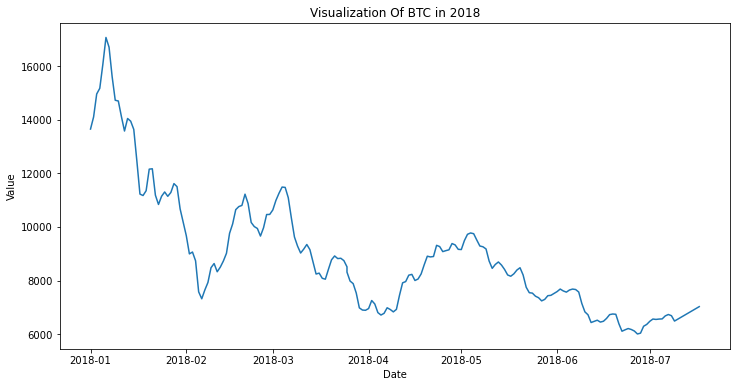

In [8]:
#CREATING NEW DATAFRAME OF YEAR 2018
data_18=data[data['year']=='2018']
#print(data_17_18.head(2))
data_18=data_18[['Date','Open','High','Low','Close','Adj Close','Volume','easy']]
print(data_18.head())
#print(data.head())

#Plotting Data of 2017 and 2018
sabai3=((data_18.Open + data_18.Close)/2.)
Dates3 = pd.to_datetime(data_18.Date)
plt.figure(figsize=(12,6))
plt.plot(Dates3,sabai3)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualization Of BTC in 2018')
plt.show()

            Date         Open         High          Low        Close  \
2907  2018-07-01  6342.689941  6673.709961  5537.859863  6615.660156   
2908  2018-07-02  6616.600098  6670.299805  6473.479980  6509.580078   
2909  2018-07-03  6508.430176  6777.970215  6411.129883  6590.060059   
2910  2018-07-04  6589.770020  6691.319824  6448.229980  6534.810059   
2911  2018-07-05  6534.810059  6633.439941  6458.140137  6602.020020   

        Adj Close     Volume month day  
2907  6615.660156  465915661    07  01  
2908  6509.580078  356390898    07  02  
2909  6590.060059  412202352    07  03  
2910  6534.810059  421189063    07  04  
2911  6602.020020  310759733    07  05  


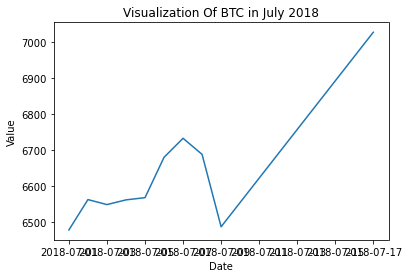

In [9]:
#CREATING NEW DATAFRAME OF YEAR 2018 JULY
data_18_july=data[((data['year']=='2018') & (data['month']=='07'))]
#print(data_17_18.head(2))
data_18_july=data_18_july[['Date','Open','High','Low','Close','Adj Close','Volume','month','day']]
print(data_18_july.head())
#print(data.head())

#Plotting Data of 2017 and 2018
sabai4 = ((data_18_july.Open + data_18_july.Close)/2.)
Dates4 = pd.to_datetime(data_18_july.Date)
plt.plot(Dates4,sabai4)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualization Of BTC in July 2018')
plt.show()

            Date         Open         High          Low        Close  \
2877  2018-06-01  7530.549805  7697.339844  7467.790039  7643.259766   
2878  2018-06-02  7643.259766  7774.959961  7606.759766  7719.750000   
2879  2018-06-03  7719.729980  7760.729980  7469.209961  7503.200195   
2880  2018-06-04  7503.319824  7672.700195  7394.970215  7629.399902   
2881  2018-06-05  7629.399902  7701.350098  7504.979980  7661.790039   

        Adj Close     Volume  
2877  7643.259766  362414878  
2878  7719.750000  332313005  
2879  7503.200195  427448262  
2880  7629.399902  440337235  
2881  7661.790039  396116252  


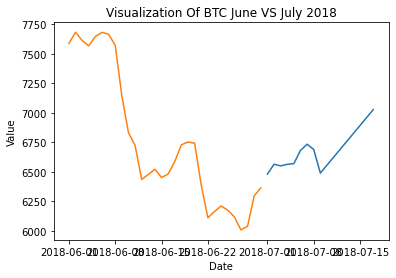

In [10]:
#June vs July
data_18_june=data[((data['month']=='06') & (data['year']=='2018'))]
#print(data_17_18.head(2))
data_18_june=data_18_june[['Date','Open','High','Low','Close','Adj Close','Volume']]
print(data_18_june.head())
#print(data.head())

#Plotting Data of 2017 and 2018
sabai5 = ((data_18_june.Open + data_18_june.Close)/2.)
Dates5 = pd.to_datetime(data_18_june.Date)
plt.plot(Dates4,sabai4)
plt.plot(Dates5,sabai5)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualization Of BTC June VS July 2018')
plt.show()

In [42]:
a='''In Conclusion, Regression Model to predict BTC is quite ineffective. It is because Bitcoin has a very complex algorithm and it actually is dependent in multiple things like economy and trading. Even though our bagging model is successful in predicting the value with 99.6% accuracy, it can't predict value of future data.
'''
b='''Samples will be taken for all of the features in the training set. This code will yield results that are more accurate, the model will not be over-fitted to the training set data. Most importantly it will reduce the variance of the decision tree'''
c='''It provides higher accuracy through cross validation. Random forest classifier will handle the missing values. And maintain the accuracy of a large proportion of data. If there are more trees, it won't allow over-fitting trees in the model. But our dataset has few datas to train, so it isn't much successful in prediction.'''
d='Decision trees tends to overfit in comparison to other algorithms, which provide too low accuracy. But if you use a decision tree in the right way i.e you prepare data in the proper format, use feature selection and perform k-fold cross-validation everything should be ok.'

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data['easy'], sabai, train_size=0.8, test_size=0.2)
x_train1, x_test1, y_train1, y_test1 = train_test_split(data['Status'], sabai, train_size=0.8, test_size=0.2)

# Linear Regression

634     20120410
2282    20161014
2802    20180319
2654    20171021
737     20120722
Name: easy, dtype: int64
[ 4040.40781505  3383.26794191 -1562.83125619  -154.14868944
  2639.65112229]
0.35022719331551067
0.37630158763593846


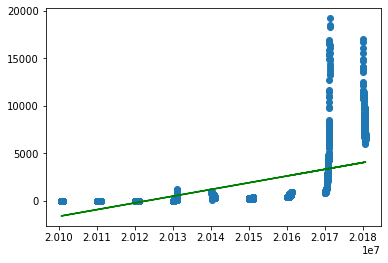

In [12]:
reg=LinearRegression()
reg.fit(x_train.values.reshape(-1, 1), y_train)
pred=reg.predict(x_test.values.reshape(-1, 1))
print(x_train[:5])
print(pred[:5])
print(reg.score(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1)))
print(reg.score(x_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1)))
plt.scatter(x_train, y_train)
plt.plot(x_test, pred, 'g')
plt.show()


# Polynomial Regression

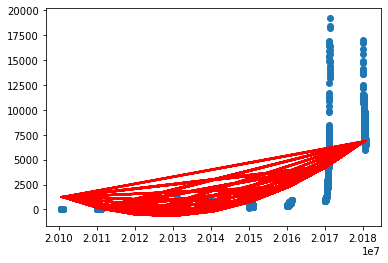

In [13]:
poly_reg = PolynomialFeatures(degree=2)
x_value = poly_reg.fit_transform(x_train.values.reshape(-1, 1))
pol = LinearRegression()
pol.fit(x_value, y_train)
plt.scatter(x_train, y_train)
predi=pol.predict(x_value)
plt.plot(x_train, predi, 'r')

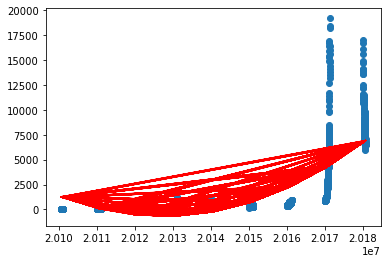

In [14]:
poly_reg = PolynomialFeatures(degree=5)
x_value = poly_reg.fit_transform(x_train.values.reshape(-1, 1))
pol = LinearRegression()
pol.fit(x_value, y_train)
plt.scatter(x_train, y_train)
predi=pol.predict(x_value)
plt.plot(x_train, predi, 'r')

# Decision Tree Regressor

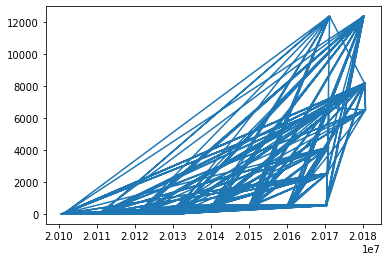

2728    20180104
2590    20170818
71      20100925
777     20120831
2063    20160310
Name: easy, dtype: int64
[12365.71003727  4192.13656784    29.80116878    29.80116878
   547.28643457]


In [15]:
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 3)  
regressor.fit(x_train.values.reshape(-1, 1), y_train)
y_pred = regressor.predict(x_test.values.reshape(-1, 1)) 
plt.plot(x_test.values.reshape(-1, 1), y_pred)
plt.show()
print(x_test[:5])
print(y_pred[:5])

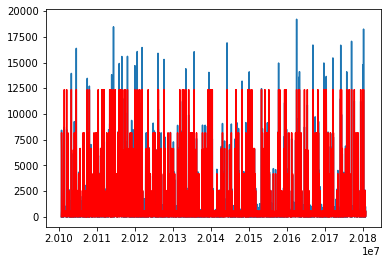

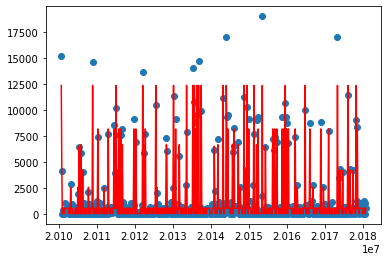

In [16]:
x_train_grid = np.linspace(min(x_train.values.reshape(-1, 1)), max(x_train.values.reshape(-1, 1)), len(y_train)) 
x_train_grid = x_train_grid.reshape((len(x_train_grid), 1))
x_test_grid = np.linspace(min(x_test), max(x_test), len(y_test)) 
x_test_grid = x_test_grid.reshape((len(x_test_grid), 1))

plt.plot(x_train_grid, y_train)
plt.plot(x_train_grid, regressor.predict(x_train.values.reshape(-1, 1)), color = 'red')
plt.show()
plt.scatter(x_test_grid, y_test)
plt.plot(x_test_grid, regressor.predict(x_test.values.reshape(-1, 1)), color = 'red')
plt.show()



In [43]:
for i in sent_tokenize(d):
    print(i)

Decision trees tends to overfit in comparison to other algorithms, which provide too low accuracy.
But if you use a decision tree in the right way i.e you prepare data in the proper format, use feature selection and perform k-fold cross-validation everything should be ok.


# Random Forest Regressor

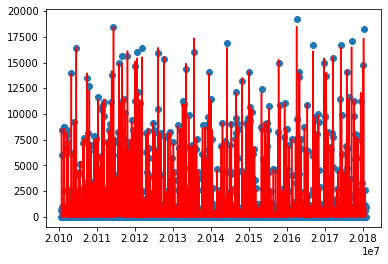

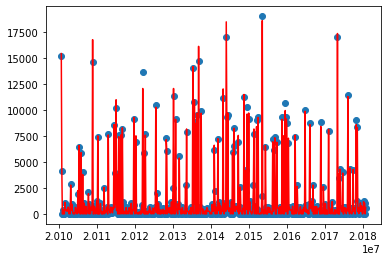

R Squared in train = 0.9991603938971595
MAE in train = 25.225406597834926
MSE in train = 6539.483748518731


R Squared in test = 0.996428655316155
MAE in test = 52.077660327658045
MSE in test = 32407.097256596633 



In [17]:
forest = RandomForestRegressor(n_estimators = 500,max_depth = 11, random_state = 0)
forest.fit(x_train.values.reshape(-1, 1), y_train)

plt.scatter(x_train_grid, y_train)
plt.plot(x_train_grid, forest.predict(x_train.values.reshape(-1, 1)), color = 'red')
plt.show()

plt.scatter(x_test_grid, y_test)
plt.plot(x_test_grid, forest.predict(x_test.values.reshape(-1, 1)), color = 'red')
plt.show()


print('R Squared in train =',r2_score(y_train, forest.predict(x_train.values.reshape(-1, 1))))
print('MAE in train =',mean_absolute_error(y_train.values.reshape(-1, 1), forest.predict(x_train.values.reshape(-1, 1))))
print('MSE in train =',mean_squared_error(y_train.values.reshape(-1, 1), forest.predict(x_train.values.reshape(-1, 1))))

print('\n')


print('R Squared in test =',r2_score(y_test, forest.predict(x_test.values.reshape(-1, 1))))
print('MAE in test =',mean_absolute_error(y_test, forest.predict(x_test.values.reshape(-1, 1))))
print('MSE in test =',mean_squared_error(y_test, forest.predict(x_test.values.reshape(-1, 1))), '\n')

In [41]:
for i in sent_tokenize(c):
    print(i)

It provides higher accuracy through cross validation.
Random forest classifier will handle the missing values.
And maintain the accuracy of a large proportion of data.
If there are more trees, it won't allow over-fitting trees in the model.
But our dataset has few datas to train, so it isn't much successful in prediction.


# Bagging the model

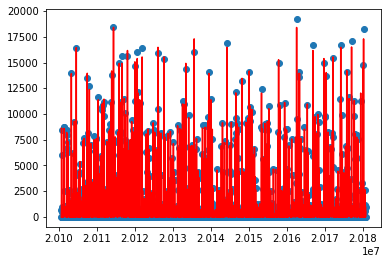

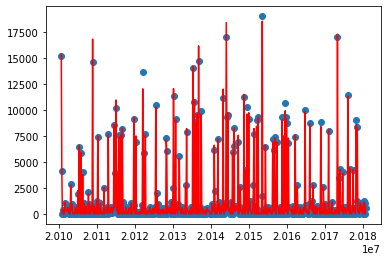

2728    20180104
2590    20170818
71      20100925
777     20120831
2063    20160310
          ...   
2431    20170313
2372    20170113
2405    20170215
222     20110224
2254    20160916
Name: easy, Length: 584, dtype: int64
R Squared (train)= 0.9991754181456954
MAE(train) = 21.819183621236416
MSE(train) = 6422.463602044901 

R Squared in test= 0.9963753788710689
MAE in test = 49.95898482885972
MSE in test = 32890.53839438468 

0.9991754181456954
0.9963753788710689


In [19]:
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators = 500)
baggingModel.fit(x_train.values.reshape(-1, 1), y_train)
plt.scatter(x_train_grid, y_train)
plt.plot(x_train_grid, baggingModel.predict(x_train.values.reshape(-1, 1)), color = 'red')
plt.show()
plt.scatter(x_test_grid, y_test)
plt.plot(x_test_grid, baggingModel.predict(x_test.values.reshape(-1, 1)), color = 'red')
plt.show()

print('R Squared (train)=',r2_score(y_train, baggingModel.predict(x_train.values.reshape(-1, 1))))
print('MAE(train) =',mean_absolute_error(y_train, baggingModel.predict(x_train.values.reshape(-1, 1))))
print('MSE(train) =',mean_squared_error(y_train, baggingModel.predict(x_train.values.reshape(-1, 1))), '\n')
print('R Squared in test=',r2_score(y_test, baggingModel.predict(x_test.values.reshape(-1, 1))))
print('MAE in test =',mean_absolute_error(y_test, baggingModel.predict(x_test.values.reshape(-1, 1))))
print('MSE in test =',mean_squared_error(y_test, baggingModel.predict(x_test.values.reshape(-1, 1))), '\n')

print(baggingModel.score(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1)))
print(baggingModel.score(x_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1)))


In [37]:
for i in sent_tokenize(b):
    print(i)

Samples will be taken for all of the features in the training set.
This code will yield results that are more accurate, the model will not be over-fitted to the training set data.
Most importantly it will reduce the variance of the decision tree


In [33]:
for i in sent_tokenize(a):
    print(i)

                                                                                                                       Injhkhks Conclusion, Regression Model to predict BTC is quite ineffective.
It is because Bitcoin has a very complex algorithm and it actually is dependent in multiple things like economy and trading.
Even though our bagging model is successful in predicting the value with 99.6% accuracy, it can't predict value of future data.
